IMPORTED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READING CSV FILE

In [3]:
data=pd.read_csv("Electric_Vehicle_Population_Data.csv")
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


EXPLORING DATA

In [4]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
data.fillna('NA',inplace=True)

In [8]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

    QUESTIONS

###Descriptive Analysis

1)How many vehicles are registered in each county?

Number of vehicles registered in each county:
 King         92740
Snohomish    21001
Pierce       13782
Name: County, dtype: int64


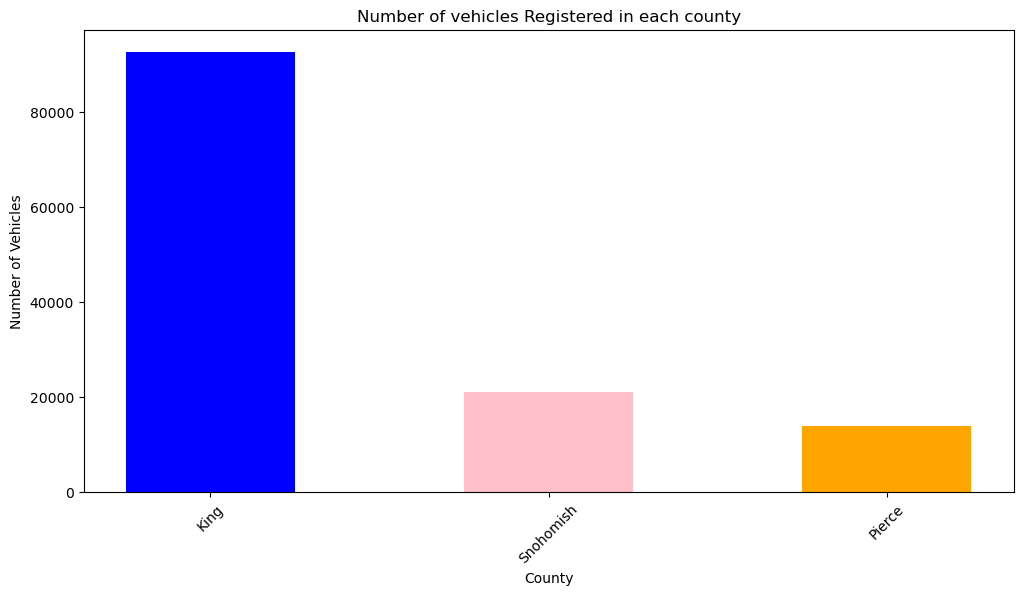

In [9]:
vehicle_per_country=data['County'].value_counts()
vehicle_county=vehicle_per_country.sort_values(ascending=False).head(3)
print("Number of vehicles registered in each county:\n",vehicle_county)

plt.figure(figsize=(12,6))
plt.bar(vehicle_county.index,vehicle_county.values,color=['blue','pink','orange','green','purple'],width=0.5,label=vehicle_county.index)
plt.title('Number of vehicles Registered in each county')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()


2)Calculate Average DOL Vehicle ID across different states?

Distribution of DOL Vehicle ID Across Different State
MN    4.761449e+08
IN    2.842257e+08
Name: DOL Vehicle ID, dtype: float64


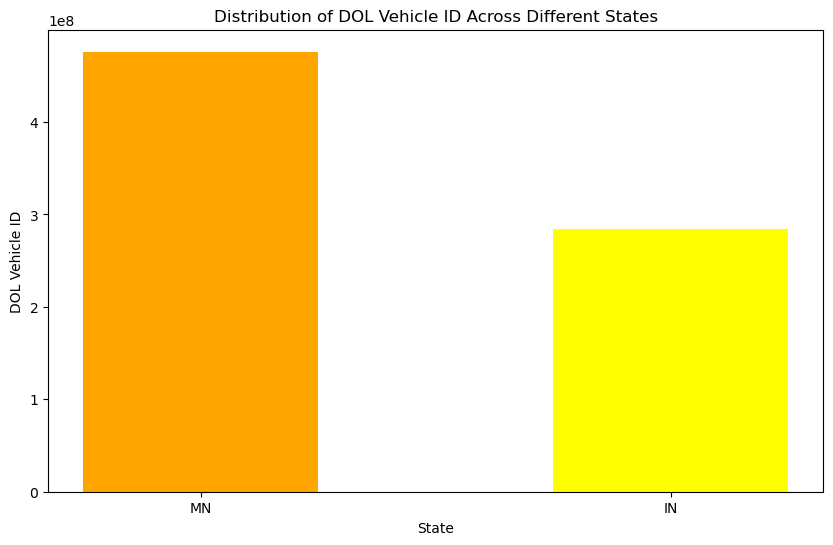

In [10]:
average = data.groupby('State')['DOL Vehicle ID'].mean()
avg1=average.sort_values(ascending=False).head(2)
print("Distribution of DOL Vehicle ID Across Different",avg1)

plt.figure(figsize=(10,6))
plt.bar(avg1.index,avg1.values,color=['Orange','yellow'],width=0.5,label=avg1.index)
plt.title('Distribution of DOL Vehicle ID Across Different States')
plt.xlabel('State')
plt.ylabel('DOL Vehicle ID')
plt.xticks()
plt.show()

###Adoption Rate Analysis

3)Which vehicle models have the highest adoption rates?

Number of Registrations by Vehicle Model :
 MODEL Y    35989
MODEL 3    30092
Name: Model, dtype: int64


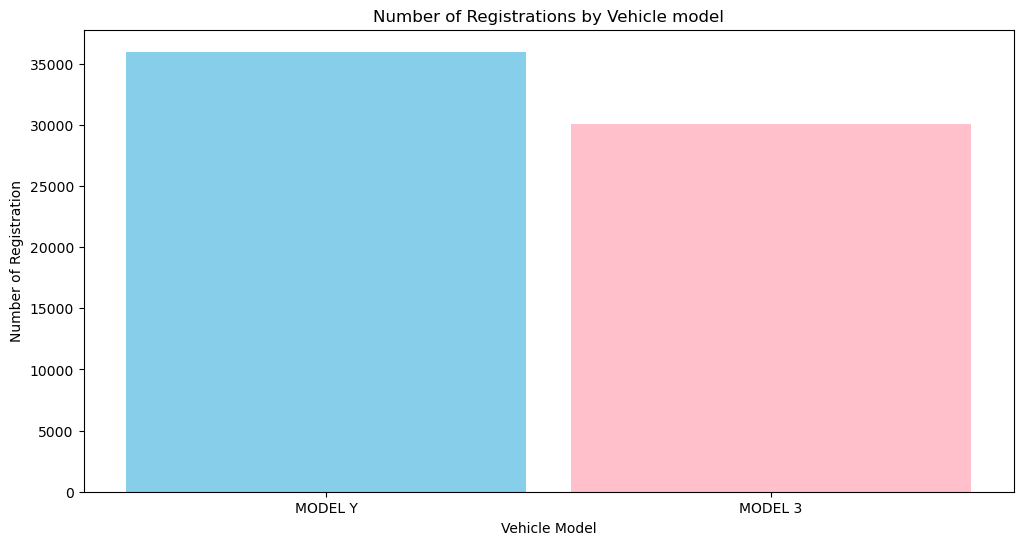

In [25]:
model_counts=data['Model'].value_counts()
model_count_sort=model_counts.sort_values(ascending=False).head(2)
print("Number of Registrations by Vehicle Model :\n",model_count_sort)

plt.figure(figsize=(12,6))
plt.bar(model_count_sort.index,model_count_sort.values,color=['skyblue','pink'],width=0.9,label=model_count_sort.index)
plt.title('Number of Registrations by Vehicle model')
plt.xlabel('Vehicle Model')
plt.ylabel('Number of Registration')
plt.xticks()
plt.show()


4)Which Electric vehicle type has the highest adoption rates?

Number of Resitration by Electric Vehicle Type : 
 Plug-in Hybrid Electric Vehicle (PHEV)     38656
Battery Electric Vehicle (BEV)            139210
Name: Electric Vehicle Type, dtype: int64


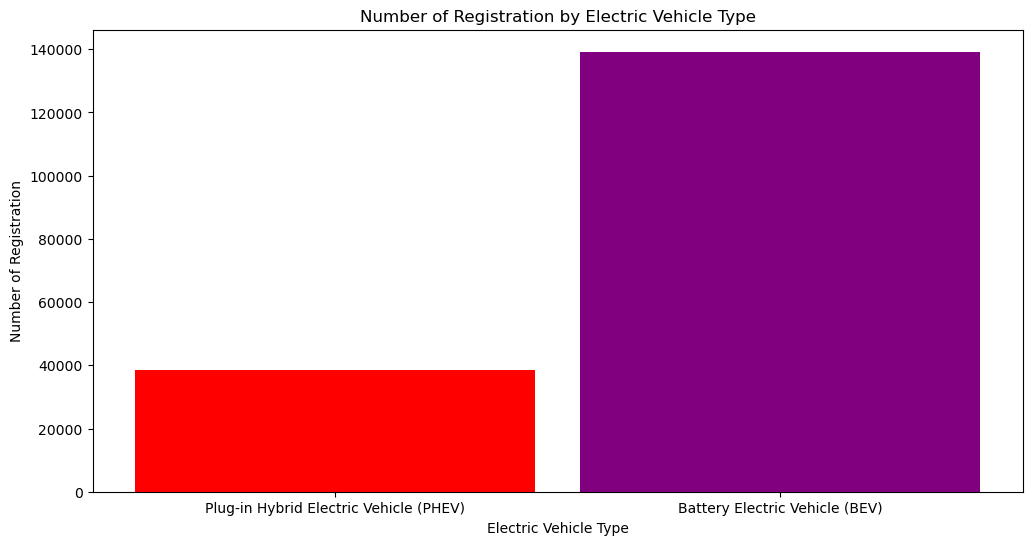

In [26]:
state_ev_type=data['Electric Vehicle Type'].value_counts()
state_ev=state_ev_type.sort_values(ascending=True).head(2)
print("Number of Resitration by Electric Vehicle Type : \n",state_ev)

plt.figure(figsize=(12,6))
plt.bar(state_ev.index,state_ev.values,color=['Red','purple'],width=0.9,label=state_ev.index)
plt.title('Number of Registration by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Registration')
plt.xticks()
plt.show()

###Distribution Analysis

5)What is the distribution of vehicles by CAFV eligibility?

Distribution of vehicles by CAFV Eligibility :
 Eligibility unknown as battery range has not been researched    91950
Clean Alternative Fuel Vehicle Eligible                         66331
Not eligible due to low battery range                           19585
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64


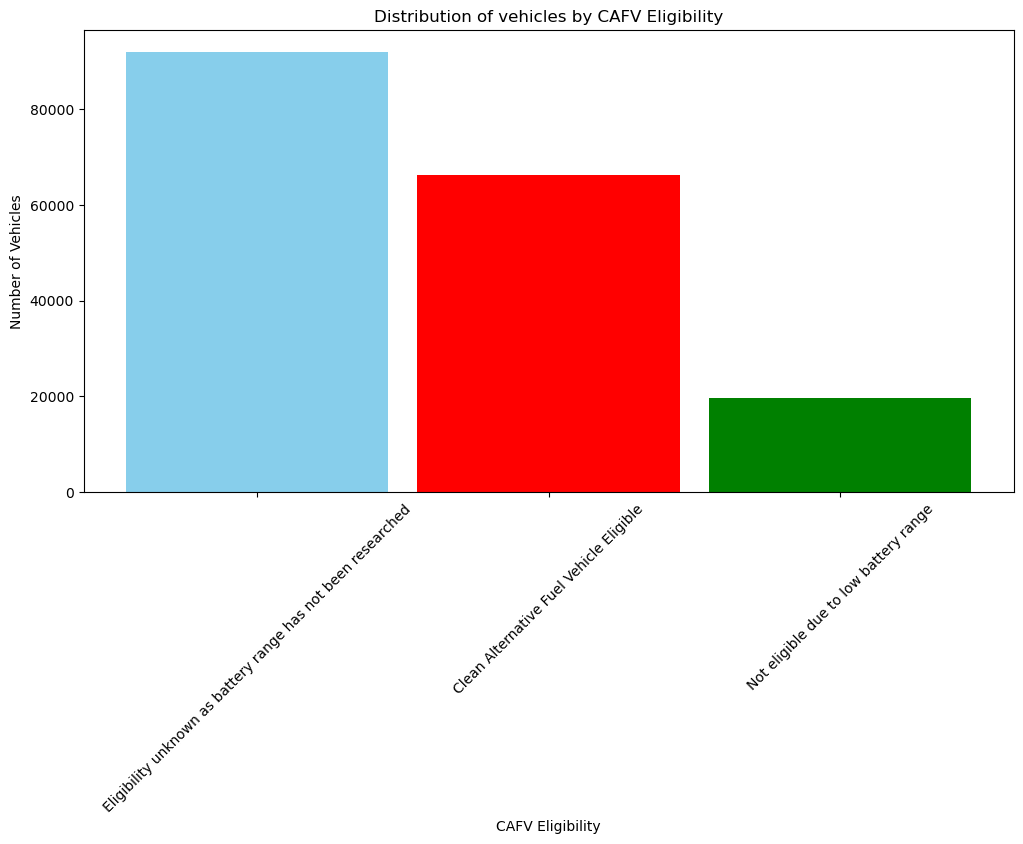

In [27]:
vehicle_cafv=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print("Distribution of vehicles by CAFV Eligibility :\n",vehicle_cafv)

plt.figure(figsize=(12,6))
plt.bar(vehicle_cafv.index,vehicle_cafv.values,color=['skyblue','red','green'],width=0.9,label=vehicle_cafv.index)
plt.title('Distribution of vehicles by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()


6)What is the distribution of electric ranges among different vehicles types?

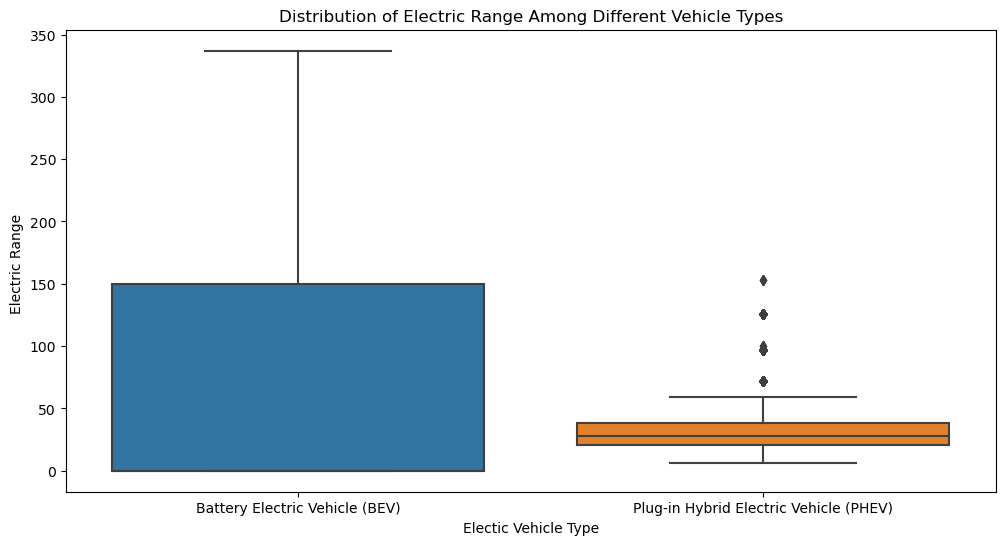

In [28]:
electric_vehicles=data[data['Electric Vehicle Type'].notnull()]
bev=electric_vehicles[electric_vehicles['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']
phev=electric_vehicles[electric_vehicles['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']

plt.figure(figsize=(12,6))
sns.boxplot(x='Electric Vehicle Type',y='Electric Range',data=electric_vehicles)
plt.title('Distribution of Electric Range Among Different Vehicle Types')
plt.xlabel('Electic Vehicle Type')
plt.ylabel('Electric Range ')
plt.xticks()
plt.show()


7)What is the distribution of postal codes in the dataset?

Distribution of Vehicles by postal code:
 King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Name: County, dtype: int64


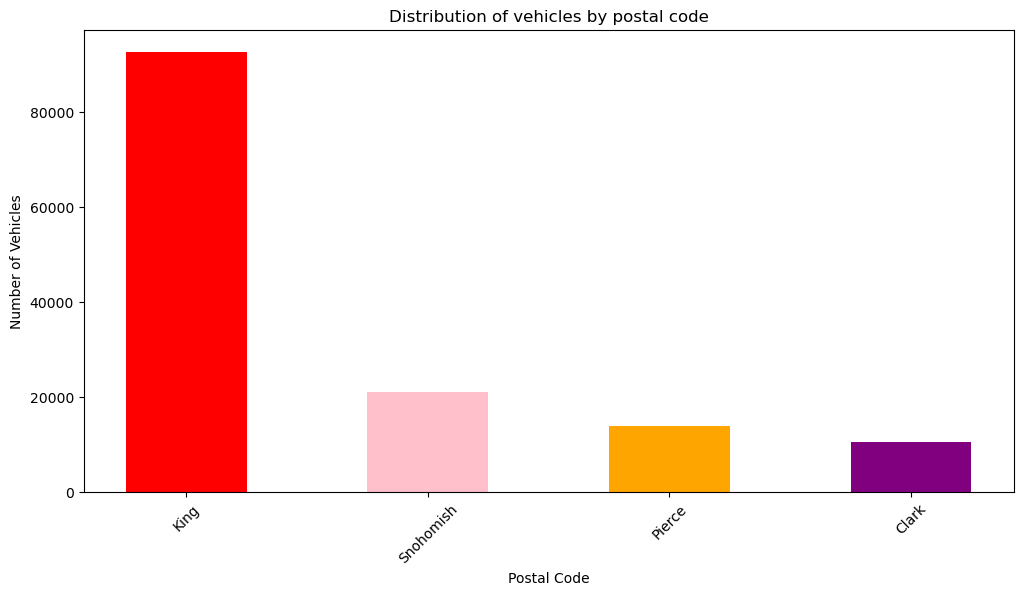

In [29]:
vehicle_postal_code=data['Postal Code'].value_counts()
vehicle_pc=vehicle_per_country.sort_values(ascending=False).head(4)
print("Distribution of Vehicles by postal code:\n",vehicle_pc)

plt.figure(figsize=(12,6))
plt.bar(vehicle_pc.index,vehicle_pc.values,color=['red','pink','orange','purple','brown'],width=0.5,label=vehicle_pc.index)
plt.title('Distribution of vehicles by postal code')
plt.xlabel('Postal Code')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

8)what is the distribution of electric utility providers?

Distribution of Vehicles by postal code:
 PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)    65990
PUGET SOUND ENERGY INC                           35882
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)     31381
Name: Electric Utility, dtype: int64


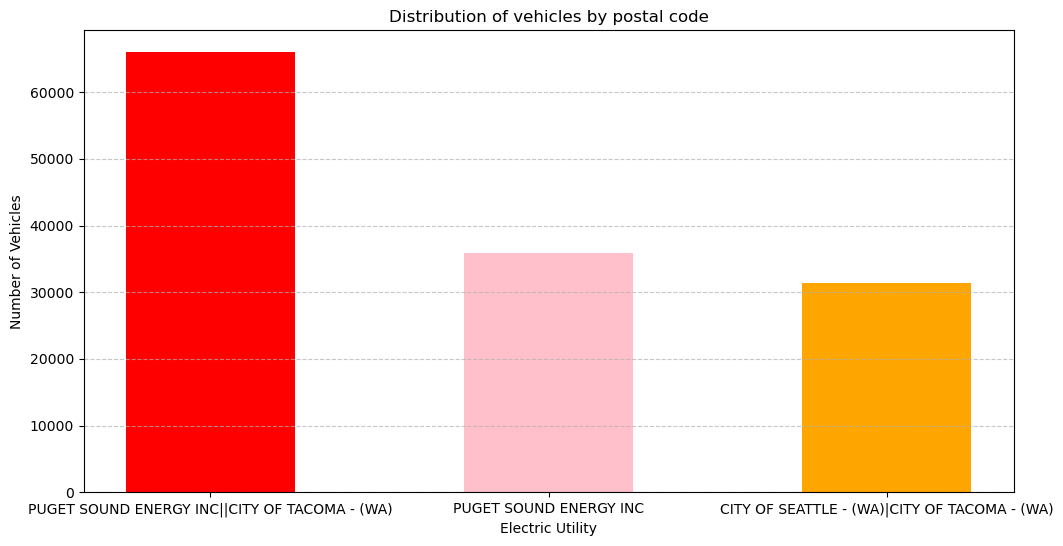

In [30]:
electric_utility=data['Electric Utility'].value_counts()
vehicle_electric_utility=electric_utility.sort_values(ascending=False).head(3)
print("Distribution of Vehicles by postal code:\n",vehicle_electric_utility)

plt.figure(figsize=(12,6))
plt.bar(vehicle_electric_utility.index,vehicle_electric_utility.values,color=['red','pink','orange','purple','brown'],width=0.5,label=vehicle_electric_utility.index)
plt.title('Distribution of vehicles by postal code')
plt.xlabel('Electric Utility')
plt.ylabel('Number of Vehicles')
plt.xticks()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

9)What is the distribution of vehicle locations in the dataset?

Distribution of vehicle Locations POINT (-122.12302 47.67668)    4574
POINT (-122.1873 47.820245)    3329
Name: Vehicle Location, dtype: int64


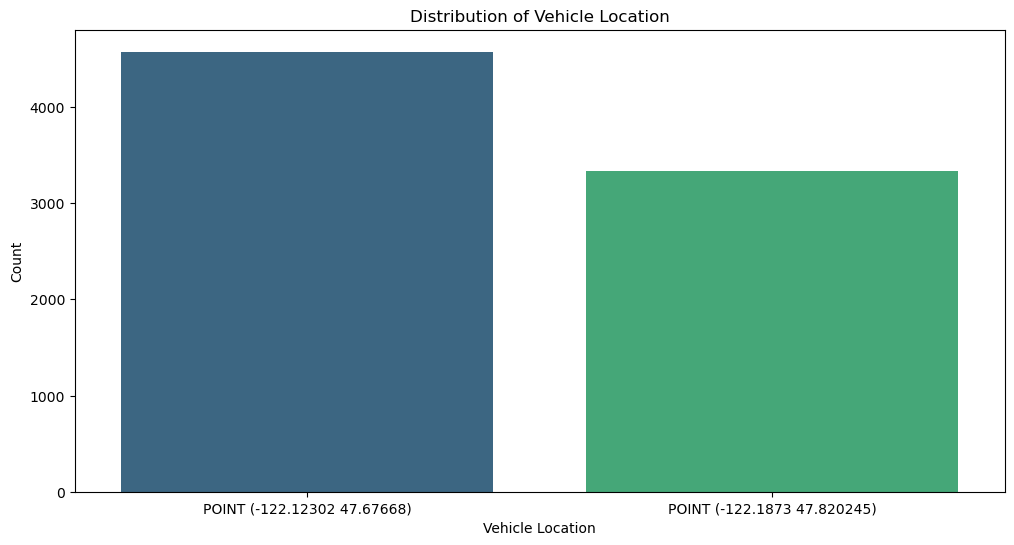

In [31]:
location_distribution=data['Vehicle Location'].value_counts()
vehicle_location=location_distribution.sort_values(ascending=False).head(2)
print("Distribution of vehicle Locations",vehicle_location)

plt.figure(figsize=(12,6))
sns.barplot(x=vehicle_location.index,y=vehicle_location.values,palette='viridis')
plt.title('Distribution of Vehicle Location')
plt.xlabel('Vehicle Location')
plt.ylabel('Count')
plt.xticks()
plt.show()

###Price Analysis

10)What is the price range of electric vehicles in each state?

Price range(minimum,maximum,average) of EVs in each State
 State
BC    32983.333333
OR    18140.000000
NV     8737.500000
Name: Base MSRP, dtype: float64


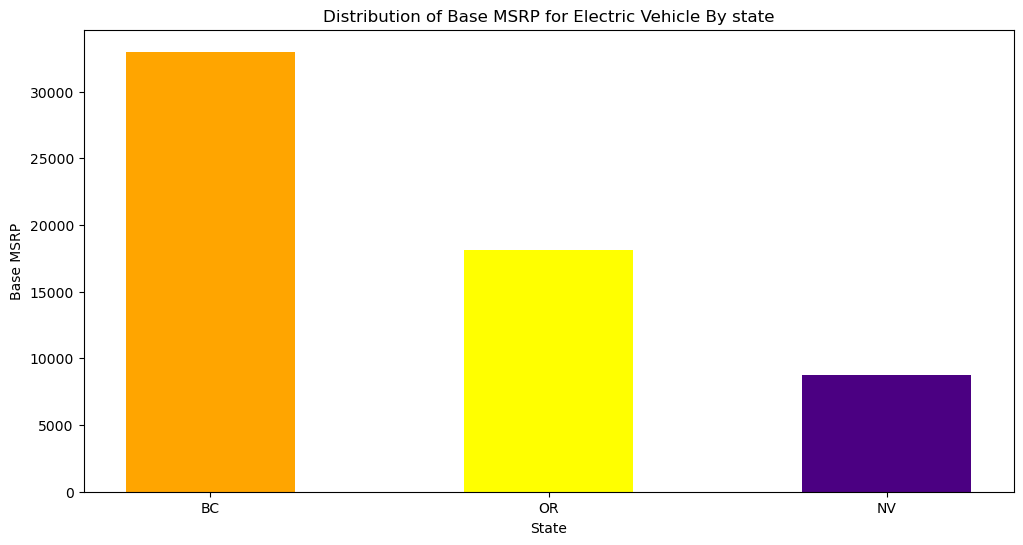

In [32]:
state_price=data.groupby('State')['Base MSRP'].mean()
state_price_stats=state_price.sort_values(ascending=False).head(3)
print("Price range(minimum,maximum,average) of EVs in each State\n",state_price_stats)

plt.figure(figsize=(12,6))
plt.bar(state_price_stats.index,state_price_stats.values,color=['Orange','yellow','Indigo'],width=0.5,label=state_price_stats.index)
plt.title('Distribution of Base MSRP for Electric Vehicle By state')
plt.xlabel('State')
plt.ylabel('Base MSRP')
plt.xticks()
plt.show()

11)How does the base MSRP vary by vehicle make?

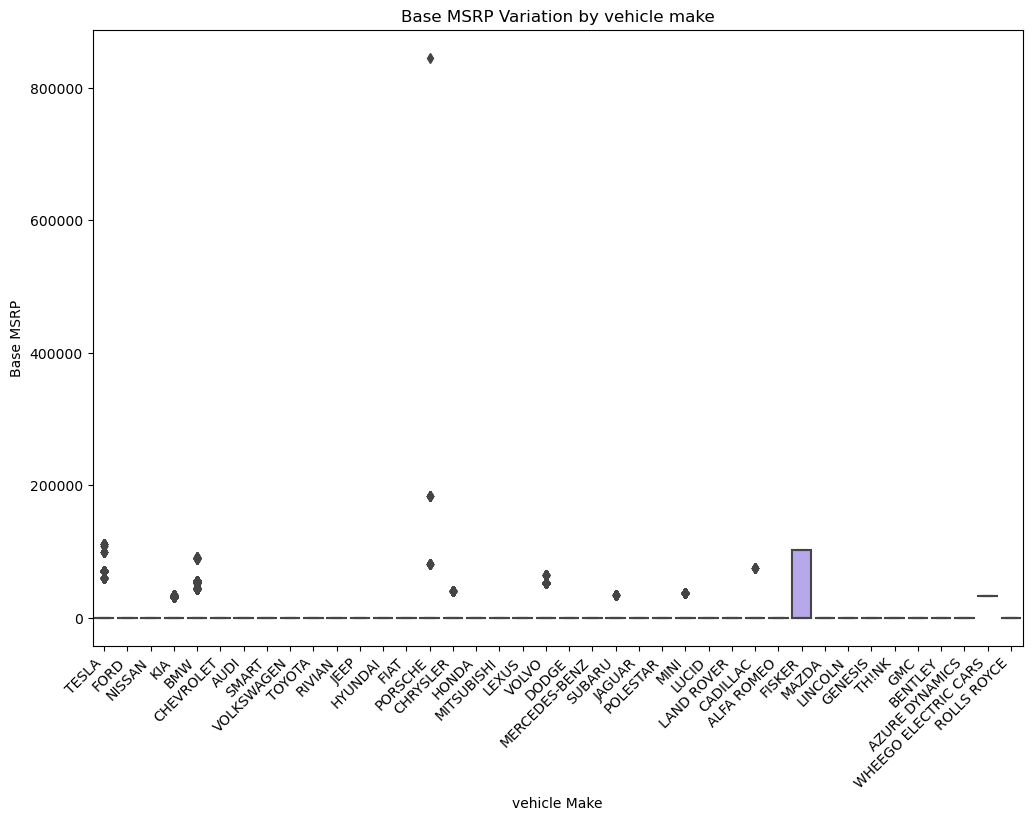

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Make',y='Base MSRP',data=data)
plt.title('Base MSRP Variation by vehicle make')
plt.xlabel('vehicle Make')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45,ha='right')
plt.show()

12)How does the CAFV eligibility affect the base MSRP of electric vehicles?

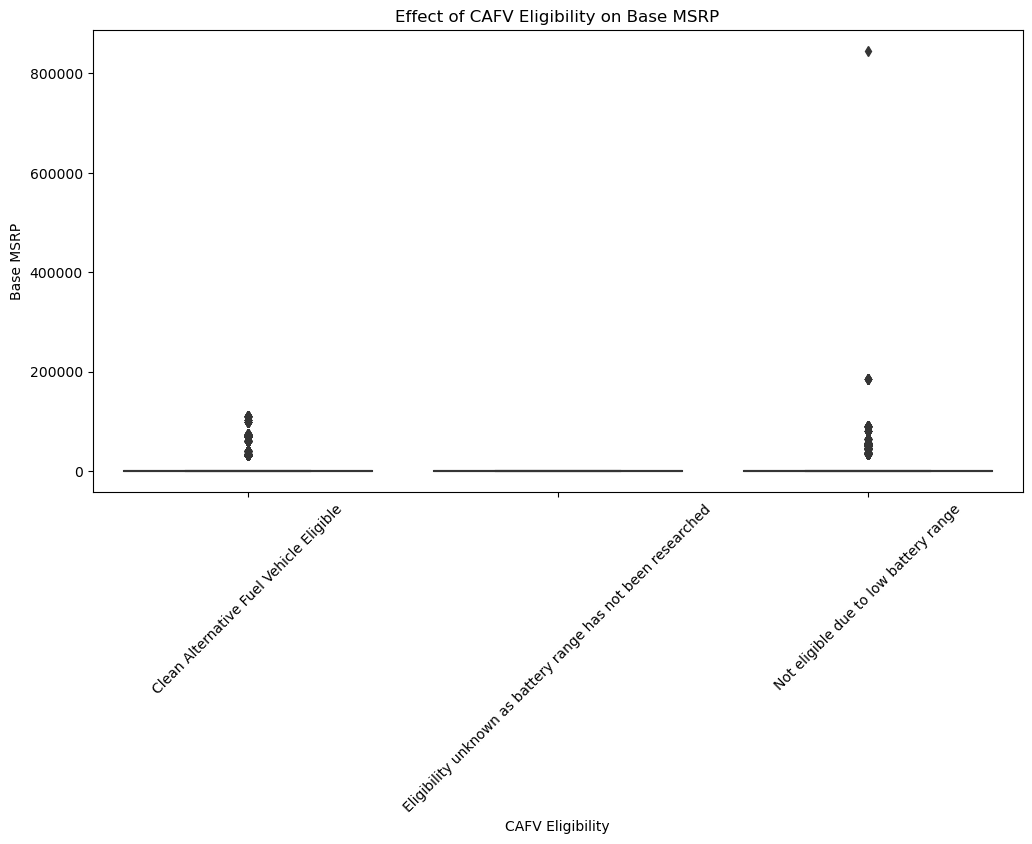

In [34]:
cafv_eligible_vehicles=data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Yes']

plt.figure(figsize=(12,6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Base MSRP',data=data,palette='viridis')
plt.title('Effect of CAFV Eligibility on Base MSRP')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45)
plt.show()

###Range Analysis

13)How does electric range vary by vehicle make?

Electric Range by vehicle make Make
TESLA        337
CHEVROLET    259
HYUNDAI      258
Name: Electric Range, dtype: int64


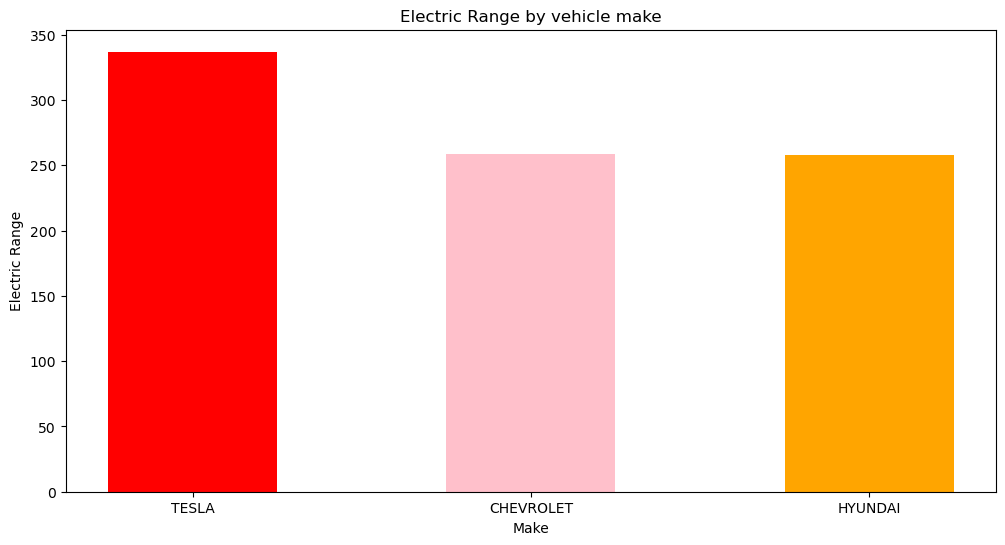

In [19]:
max_range_by_make=data.groupby('Make')['Electric Range'].max()
vehicle_range=max_range_by_make.sort_values(ascending=False).head(3)
print("Electric Range by vehicle make",vehicle_range)

plt.figure(figsize=(12,6))
plt.bar(vehicle_range.index,vehicle_range.values,color=['red','pink','orange'],width=0.5,label=vehicle_range.index)
plt.title('Electric Range by vehicle make')
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.xticks()
plt.show()